In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import ssl
from datetime import datetime

In [2]:
base = 'datos_reinhart/'
df_list = []
df_1= pd.read_csv(base+'banking_crises_dates.csv', delimiter=';')
df_1 = df_1.drop(index = 0)
df_1 = df_1.drop(index = 3)
df_1.columns = df_1.loc[2]
df_1 = df_1.iloc[:, 0:67]
# df_1.rename(columns = {'NaN':'date'}, inplace = True)
df_1 = df_1.replace(np.nan, 0)
df_1 = df_1.rename(columns={np.nan: 'year'})
country_listed = df_1.loc[1].copy()
df_1 = df_1.reset_index(drop=True)
df_1 = df_1.drop(index=df_1[df_1.index > 210].index)
df_1.loc[df_1.index >= 1] = df_1.loc[df_1.index >= 1].apply(pd.to_numeric)
df_1.iloc[0] = df_1.iloc[0].str.strip()

In [3]:
base = 'datos_reinhart/'
# Empty list to store dataframes
df_list = []
df_2 = pd.read_excel(base+'informacion_completa.xlsx', None)
lista_df = []
for sheet in df_2.keys():
    if sheet != 'README' and sheet != 'Sheet1':
        if sheet == 'algeria':
            df_temporal = pd.read_excel(base+'informacion_completa.xlsx', sheet_name = sheet)
            df_temporal = df_temporal.T
            #df_temporal.loc[df_temporal.index >= 3] = df_temporal.loc[df_temporal.index >= 3].apply(pd.to_numeric,errors='coerce')
            lista_df.append(df_temporal)
        else:
            df_temporal = pd.read_excel(base+'informacion_completa.xlsx', sheet_name = sheet)
            df_temporal = df_temporal.T
            df_temporal = df_temporal.reset_index(drop=True)
            df_temporal.loc[:, :]
            df_temporal.drop([0,1,2], inplace=True)
            # df_temporal = df_temporal.apply(pd.to_numeric)
            lista_df.append(df_temporal)
df_2_original = pd.concat(lista_df)
df_2_original.head(10)
# 28.3s


,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
Unnamed: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 1,index,country,year,inclevel,ifscode,NaN,"Gross Domestic Product/source: IMF, WEO",ngdp,gdpdef,rgdp,...,medgdp,agdp,dummy,dummy2,timedum,cris1,cris2,mcode,mgcode,regime
Unnamed: 2,country index number,country,year,WB income level classification,IFS country code,NaN,NaN,nominal gdp (bils nc),gdp deflator,real gdp (bils nc),...,60-03 median of real gdp growth,current annual real gdp growth,1 if current growth>median growth rate,1 if current growth > 0 (zero),1 if year>1980,1 if crisis at 12.5%,1 if crisis at 25%,fine natural regime classification (RR),coarse natural regime classification (RR),"1= 1+2, 2=3+4, 3=5 in RR classification"
1960,1,Algeria,1960,2,612,NaN,NaN,NaN,NaN,NaN,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
1961,1,Algeria,1961,2,612,NaN,NaN,NaN,NaN,NaN,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
1962,1,Algeria,1962,2,612,NaN,NaN,11.7455,3.47656,337.848,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
1963,1,Algeria,1963,2,612,NaN,NaN,18.835,4.28067,440.001,...,3.73,26.42,1,1,0,0,0,2,1,1
1964,1,Algeria,1964,2,612,NaN,NaN,20.3019,4.5632,444.906,...,3.73,1.11,0,1,0,0,0,10,3,2
1965,1,Algeria,1965,2,612,NaN,NaN,22.3917,4.86437,460.32,...,3.73,3.41,0,1,0,0,0,10,3,2
1966,1,Algeria,1966,2,612,NaN,NaN,21.8713,5.18542,421.785,...,3.73,-8.74,0,0,0,0,0,10,3,2


In [4]:

df_2_arreglo = df_2_original.copy()
df_2_arreglo = df_2_arreglo.reset_index(drop=True)
df_2_arreglo.reset_index(drop=True)
df_2_arreglo.drop([0], inplace=True)
mask = df_2_arreglo[df_2_arreglo.columns].isnull()
# select only the columns that have at least one null/missing value in the specified cell
cols_with_null_cell = []    
for col in df_2_arreglo.columns:
    if pd.isna(df_2_arreglo.loc[2,col]):
        cols_with_null_cell.append(col)
df_2_arreglo = df_2_arreglo.drop(columns=cols_with_null_cell)
df_2_arreglo.columns = range(df_2_arreglo.columns.size)
df_2_arreglo.head()

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
1,index,country,year,inclevel,ifscode,ngdp,gdpdef,rgdp,gdpus,tflow,...,medgdp,agdp,dummy,dummy2,timedum,cris1,cris2,mcode,mgcode,regime
2,country index number,country,year,WB income level classification,IFS country code,nominal gdp (bils nc),gdp deflator,real gdp (bils nc),gdp in us dollars (bills),total capital flows net,...,60-03 median of real gdp growth,current annual real gdp growth,1 if current growth>median growth rate,1 if current growth > 0 (zero),1 if year>1980,1 if crisis at 12.5%,1 if crisis at 25%,fine natural regime classification (RR),coarse natural regime classification (RR),"1= 1+2, 2=3+4, 3=5 in RR classification"
3,1,Algeria,1960,2,612,NaN,NaN,NaN,NaN,NaN,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
4,1,Algeria,1961,2,612,NaN,NaN,NaN,NaN,NaN,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
5,1,Algeria,1962,2,612,11.7455,3.47656,337.848,2.37905,NaN,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1


In [5]:
df_2_arreglo.columns = range(df_2_arreglo.columns.size)
df_2_arreglo = df_2_arreglo.rename(columns={1: 'country'})
df_2_arreglo = df_2_arreglo.rename(columns={2: 'year'})
df_2_arreglo = df_2_arreglo.dropna(subset=['year'])
df_2_arreglo['country'] = df_2_arreglo['country'].str.strip()
df_2_arreglo.loc[3:, 'year'] = pd.to_numeric(df_2_arreglo.loc[3:, 'year']).astype(int)
df_2_arreglo.loc[3:, 'year'] = df_2_arreglo.loc[3:, 'year'].astype(int)
df_2_arreglo['crisis'] = ''
df_2_arreglo['crisis'][1] = 'crisis'
df_2_arreglo = df_2_arreglo.rename(columns={'crisis':(df_2_arreglo.columns.size-1)})
df_2_arreglo.reset_index(inplace=True)
df_2_arreglo.head()


,index,0,country,year,3,4,5,6,7,8,...,205,206,207,208,209,210,211,212,213,214
0,1,index,country,year,inclevel,ifscode,ngdp,gdpdef,rgdp,gdpus,...,agdp,dummy,dummy2,timedum,cris1,cris2,mcode,mgcode,regime,crisis
1,2,country index number,country,year,WB income level classification,IFS country code,nominal gdp (bils nc),gdp deflator,real gdp (bils nc),gdp in us dollars (bills),...,current annual real gdp growth,1 if current growth>median growth rate,1 if current growth > 0 (zero),1 if year>1980,1 if crisis at 12.5%,1 if crisis at 25%,fine natural regime classification (RR),coarse natural regime classification (RR),"1= 1+2, 2=3+4, 3=5 in RR classification",
2,3,1,Algeria,1960,2,612,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,2,1,1,
3,4,1,Algeria,1961,2,612,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,2,1,1,
4,5,1,Algeria,1962,2,612,11.7455,3.47656,337.848,2.37905,...,NaN,NaN,NaN,0,0,0,2,1,1,


In [6]:
lista_df = []
for country in df_1.columns:
    if country != 'year':
        df_temporal = df_1[['year',country]].copy()
        df_temporal['country'] = df_temporal[country][0].strip()
        df_temporal['crisis'] = df_temporal[country][2:]
        df_temporal.drop(index=[0,1],inplace=True)
        df_temporal.drop([country], axis=1,inplace=True)
        lista_df.append(df_temporal)
df_1_arreglo = pd.concat(lista_df)
df_1_arreglo.reset_index


<bound method DataFrame.reset_index of 2    year      country crisis
2    1800      Algeria      0
3    1801      Algeria      0
4    1802      Algeria      0
5    1803      Algeria      0
6    1804      Algeria      0
..    ...          ...    ...
206  2004  New Zealand      0
207  2005  New Zealand      0
208  2006  New Zealand      0
209  2007  New Zealand      0
210  2008  New Zealand      0

[13794 rows x 3 columns]>

In [7]:
df_1_arreglo = df_1_arreglo.reset_index(drop=True)
df_1_arreglo =df_1_arreglo[['year', 'country', 'crisis']]

In [8]:
df_general = pd.merge( df_2_arreglo,df_1_arreglo, on=['year','country'])
df_general.drop(['index',214], axis=1,inplace=True)
# df_general = df_general.rename(columns={'crisis_y': 'crisis'})
df_general_1 = df_general.copy()
df_general_1['crisis'] = df_general['crisis'].copy()
df_2_arreglo.rename(columns=df_2_arreglo.iloc[0],inplace=True)
# df_2_arreglo.drop(index=[0,1],inplace=True)
# df_2_arreglo.reset_index(inplace=True)
df_2_arreglo.drop([1], axis=1,inplace=True)


In [9]:
df_general.head()

,0,country,year,3,4,5,6,7,8,9,...,205,206,207,208,209,210,211,212,213,crisis
0,1,Algeria,1960,2,612,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,2,1,1,0
1,1,Algeria,1961,2,612,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,2,1,1,0
2,1,Algeria,1962,2,612,11.7455,3.47656,337.848,2.37905,NaN,...,NaN,NaN,NaN,0,0,0,2,1,1,0
3,1,Algeria,1963,2,612,18.835,4.28067,440.001,3.81503,NaN,...,26.42,1,1,0,0,0,2,1,1,0
4,1,Algeria,1964,2,612,20.3019,4.5632,444.906,4.11215,NaN,...,1.11,0,1,0,0,0,10,3,2,0


In [10]:
df_2_arreglo.head()

,index,country,year,inclevel,ifscode,ngdp,gdpdef,rgdp,gdpus,tflow,...,agdp,dummy,dummy2,timedum,cris1,cris2,mcode,mgcode,regime,crisis
0,index,country,year,inclevel,ifscode,ngdp,gdpdef,rgdp,gdpus,tflow,...,agdp,dummy,dummy2,timedum,cris1,cris2,mcode,mgcode,regime,crisis
1,country index number,country,year,WB income level classification,IFS country code,nominal gdp (bils nc),gdp deflator,real gdp (bils nc),gdp in us dollars (bills),total capital flows net,...,current annual real gdp growth,1 if current growth>median growth rate,1 if current growth > 0 (zero),1 if year>1980,1 if crisis at 12.5%,1 if crisis at 25%,fine natural regime classification (RR),coarse natural regime classification (RR),"1= 1+2, 2=3+4, 3=5 in RR classification",
2,1,Algeria,1960,2,612,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,2,1,1,
3,1,Algeria,1961,2,612,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,2,1,1,
4,1,Algeria,1962,2,612,11.7455,3.47656,337.848,2.37905,NaN,...,NaN,NaN,NaN,0,0,0,2,1,1,


In [11]:
df_general_1.drop([214], inplace=True)
df_general_1.columns = df_2_arreglo.columns
df_general_1['crisis'] = pd.to_numeric(df_general_1['crisis'])

In [12]:
df_general_1.head()

,index,country,year,inclevel,ifscode,ngdp,gdpdef,rgdp,gdpus,tflow,...,agdp,dummy,dummy2,timedum,cris1,cris2,mcode,mgcode,regime,crisis
0,1,Algeria,1960,2,612,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,2,1,1,0
1,1,Algeria,1961,2,612,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,2,1,1,0
2,1,Algeria,1962,2,612,11.7455,3.47656,337.848,2.37905,NaN,...,NaN,NaN,NaN,0,0,0,2,1,1,0
3,1,Algeria,1963,2,612,18.835,4.28067,440.001,3.81503,NaN,...,26.42,1,1,0,0,0,2,1,1,0
4,1,Algeria,1964,2,612,20.3019,4.5632,444.906,4.11215,NaN,...,1.11,0,1,0,0,0,10,3,2,0


In [13]:
df_general_1.columns

Index(['index', 'country', 'year', 'inclevel', 'ifscode', 'ngdp', 'gdpdef',
       'rgdp', 'gdpus', 'tflow',
       ...
       'agdp', 'dummy', 'dummy2', 'timedum', 'cris1', 'cris2', 'mcode',
       'mgcode', 'regime', 'crisis'],
      dtype='object', length=215)

In [14]:
na_counts = df_general_1.isna().sum()

# sort the na_counts Series by ascending order
top = na_counts.nsmallest(20)

# create a list of the column names
result = list(top.index)

# display the resulting list
print(result)

['index', 'country', 'year', 'inclevel', 'ifscode', 'infmean', 'medgdp', 'timedum', 'crisis', 'cris1', 'cris2', 'resrv', 'H_resrv', 'C_resrv', 'trade', 'H_trade', 'C_trade', 'rgdp', 'H_rgdp', 'C_rgdp']


**RANDOM FOREST**


In [45]:
missing_values = df_2_arreglo.isna().sum()

# sort the missing values in descending order
missing_values_sorted = missing_values.sort_values()

# print the missing values in descending order
print(missing_values_sorted[:25])
# df_modelo_7 = df_general_1[['index', 'country', 'year', 'inclevel','assts', 'ifscode','trade', 'crisis','lend', 'dep','ceexpr','nsav2','resm','timedum']].copy()

index         0
timedum       0
medgdp        0
infmean       0
crisis        0
inclevel      0
year          0
ifscode       0
country       0
H_trade     104
C_trade     104
trade       104
cris2       111
cris1       111
H_rgdp      243
rgdp        243
C_rgdp      243
ydiffer     243
ygap        243
ngdpm       300
ngdpm2      300
ngdp        307
gdpus       307
gdpdef      316
C_cpi       317
dtype: int64


In [53]:
df_2_arreglo['lend'].count()

2189

In [15]:
df_modelo_1 = df_general_1[result].copy()
df_modelo_2 = df_general_1[['index', 'country', 'year','inclevel','assts', 'ifscode', 'H_resrv', 'C_resrv', 'timedum', 'crisis']].copy()
df_modelo_3 = df_general_1[['index', 'country', 'year', 'inclevel','assts', 'ifscode', 'H_resrv', 'C_resrv','trade', 'crisis','lend', 'dep','ceexpr']].copy()
df_modelo_4 = df_general_1[['index', 'country', 'year', 'inclevel','assts', 'ifscode', 'H_resrv', 'C_resrv','timedum','trade', 'crisis','lend', 'dep','ceexpr']].copy()
df_modelo_5 = df_general_1[['index', 'country', 'year', 'inclevel','assts', 'ifscode', 'H_resrv', 'C_resrv','trade', 'crisis','lend', 'dep','ceexpr','cbal1']].copy()
df_modelo_6 = df_general_1[['index', 'country', 'year', 'inclevel','assts', 'ifscode','trade', 'crisis','lend', 'dep','ceexpr','cbal1','nsav2']].copy()
df_modelo_7 = df_general_1[['index', 'country', 'year', 'inclevel','assts', 'ifscode','trade', 'crisis','lend', 'dep','ceexpr','nsav2','resm','timedum']].copy()

df_prueba = df_modelo_7.copy()
df_prueba = df_prueba.dropna(how='any')
countries = df_prueba['country'].unique()
cantidad_paises = len(countries)
observaciones = df_prueba.shape[0]
print('Listado países: ',countries)
print('Cantidad de paises: ',cantidad_paises)
print('Cantidad de observaciones: ',observaciones)

Listado países:  ['Algeria' 'Argentina' 'Austria' 'Belgium' 'Bolivia' 'Brazil' 'Canada'
 'Chile' 'Colombia' 'Costa Rica' 'Denmark' 'Ecuador' 'Egypt' 'El Salvador'
 'Finland' 'France' 'Germany' 'Greece' 'Guatemala' 'Indonesia' 'Italy'
 'Japan' 'Kenya' 'Korea' 'Malaysia' 'Mauritius' 'Mexico' 'Morocco'
 'Netherlands' 'New Zealand' 'Nicaragua' 'Nigeria' 'Norway' 'Paraguay'
 'Peru' 'Philippines' 'Portugal' 'South Africa' 'Spain' 'Sri Lanka'
 'Sweden' 'Thailand' 'Tunisia' 'United Kingdom' 'United States' 'Uruguay'
 'Zambia' 'Zimbabwe']
Cantidad de paises:  48
Cantidad de observaciones:  842


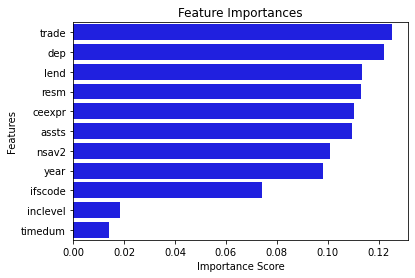

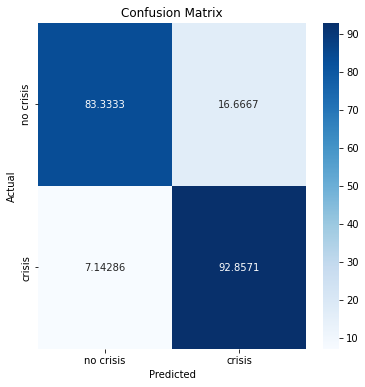

In [28]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X = df_prueba.drop(columns=['crisis','country','index'])

y = df_prueba['crisis']
y=pd.to_numeric(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, random_state=25) # 0.25 x 0.8 = 0.2

rf = RandomForestClassifier(random_state = 25, criterion='entropy',class_weight='balanced',n_estimators=60,max_depth=40)
rf.fit(X_train, y_train)
y_pred=rf.predict_proba(X_val)
y_pred=(y_pred[:,1]>0.2).astype(int)
importances = rf.feature_importances_
# print feature importances
df_imp = pd.DataFrame({'feature': X.columns, 'importance': importances})
# sort dataframe by importance score
df_imp = df_imp.sort_values('importance', ascending=False)
# create a bar chart of feature importances
sns.barplot(x='importance', y='feature', data=df_imp, color='b')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()
cm=confusion_matrix(y_val, y_pred)
cm = cm.astype('float')*100/ cm.sum(axis=1)[:, np.newaxis]
cm_df = pd.DataFrame(cm, columns=['no crisis', 'crisis'], index=['no crisis', 'crisis'])
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

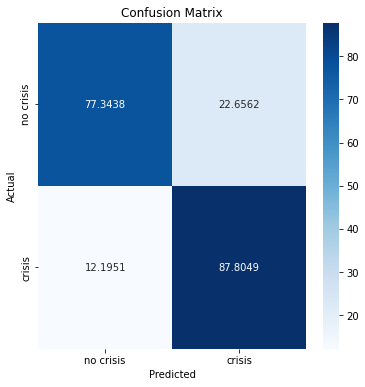

In [29]:
# Testeo final
y_pred=rf.predict_proba(X_test)
y_pred=(y_pred[:,1]>0.2).astype(int)
cm=confusion_matrix(y_test, y_pred)
cm = cm.astype('float')*100/ cm.sum(axis=1)[:, np.newaxis]
cm_df = pd.DataFrame(cm, columns=['no crisis', 'crisis'], index=['no crisis', 'crisis'])
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
cantidad_crisis = df_prueba['crisis'].sum()
ventana = df_prueba['year'].max() - df_prueba['year'].min()
print(cantidad_crisis, ventana)


170 31


In [19]:
df_prueba[(df_prueba['country']=='Mexico') & (df_prueba['year']==1995)]['crisis'].head()

1355    1
Name: crisis, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X = df_prueba.drop(columns=['crisis','country','index'])

y = df_prueba['crisis']
y=pd.to_numeric(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, random_state=25) # 0.25 x 0.8 = 0.2

X_test =df_prueba[(df_prueba['country']=='Mexico') & ((df_prueba['year']==1993)|(df_prueba['year']==1994))]
X_test = X_test.drop(columns=['crisis','country','index'])
y_test = df_prueba[(df_prueba['country']=='Mexico') & ((df_prueba['year']==1993)|(df_prueba['year']==1994))]['crisis']

rf = RandomForestClassifier(random_state = 25, criterion='entropy',class_weight='balanced',n_estimators=60,max_depth=40)

rf.fit(X_train, y_train)
y_pred=rf.predict_proba(X_test.reshape(1, -1))
y_pred=(y_pred[:,1]>0.2).astype(int)
importances = rf.feature_importances_
# print feature importances
df_imp = pd.DataFrame({'feature': X.columns, 'importance': importances})
# sort dataframe by importance score
df_imp = df_imp.sort_values('importance', ascending=False)
# create a bar chart of feature importances
sns.barplot(x='importance', y='feature', data=df_imp, color='b')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()
cm=confusion_matrix(y_test, y_pred)
cm = cm.astype('float')*100/ cm.sum(axis=1)[:, np.newaxis]
cm_df = pd.DataFrame(cm, columns=['no crisis', 'crisis'], index=['no crisis', 'crisis'])
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'reshape'